## 1. Load Modules
First we load the appropriate modules into our python environment/idle/whatever its called.

In [39]:
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen

plt.style.use('ggplot')

# HEAVILY INFLUENCED Jason's Python Tutorials
UCI_data_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

## 2. Get Data
The iris dataset is very popular in statistical learning, and is readily available in the UCI database. We call up the data set using `urllib` module and input into a `pandas DataFrame`.

In [6]:
iris = pd.read_csv(urlopen(UCI_data_URL), 
                   names = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species'])
iris.head(6)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


Our terminal output above shows six observations of our data. We can appreciate a total of five variables. The goal is to predict species as a function of the other four variables.

Next we do exploratory analysis.

## 3. Exploratory Analysis
We begin our exploratory analysis by looking for relationships across our explanatory and predicted variables. For this, we use `matplotlib` to  generate scatterplots of the `Sepal.Length` (y-axis) and `Sepal.Width` (x-axis), and the `Petal.Length` (y-axis) and `Petal.Width` (x-axis).

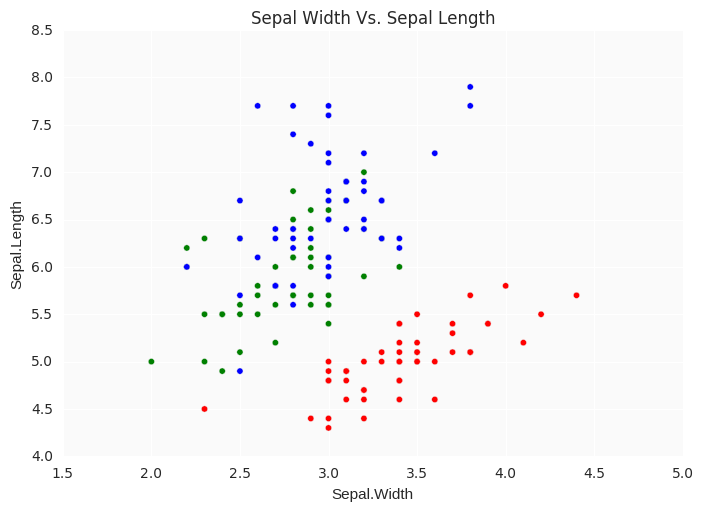

In [52]:
fig, ax = plt.subplots()

# REFERENCE (SINCE COULDN'T FIND WAY TO DO USING JUST simple matplotlib commands): 
# http://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib
colors = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}

ax.set_axis_bgcolor('#fafafa')

plt.title("Sepal Width Vs. Sepal Length")
plt.ylabel("Sepal.Length")
plt.xlabel("Sepal.Width")

plt.scatter(iris['Sepal.Width'], iris['Sepal.Length'], 
            c = iris['Species'].apply(lambda x: colors[x]))
plt.show()

<img src="images/image1.png">

Next we plot the `Petal.Length` vs the `Petal.Width`!

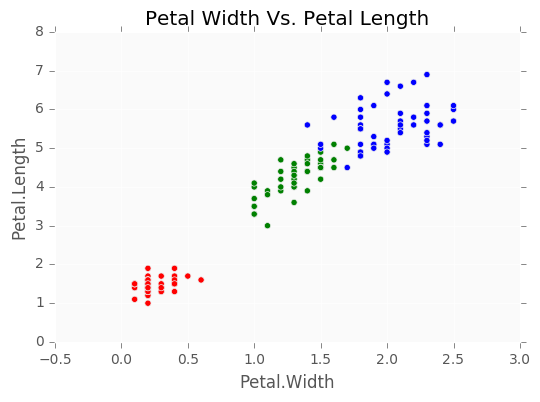

In [29]:
fig, ax = plt.subplots()

# REFERENCE (SINCE COULDN'T FIND WAY TO DO USING JUST simple matplotlib commands): 
# http://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib
colors = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}

ax.set_axis_bgcolor('#fafafa')

plt.title("Petal Width Vs. Petal Length")
plt.xlabel("Petal.Width")
plt.ylabel("Petal.Length")

plt.scatter(iris['Petal.Width'], iris['Petal.Length'], 
            c = iris['Species'].apply(lambda x: colors[x]))
plt.show()

<img src='images/image2.png'>

 The plots below shows **Setosa** to be most distinguisable of the three species with respect to both **Sepal** and **Petal** attributes. We can infer then that the setosa species will yield the least prediction errors, while the other two species, **Versicolor** and **Virginica**, might not.

Below is a plot that shows the relationships across our various explanatory variables.

/home/rxe/anaconda3/envs/puto/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


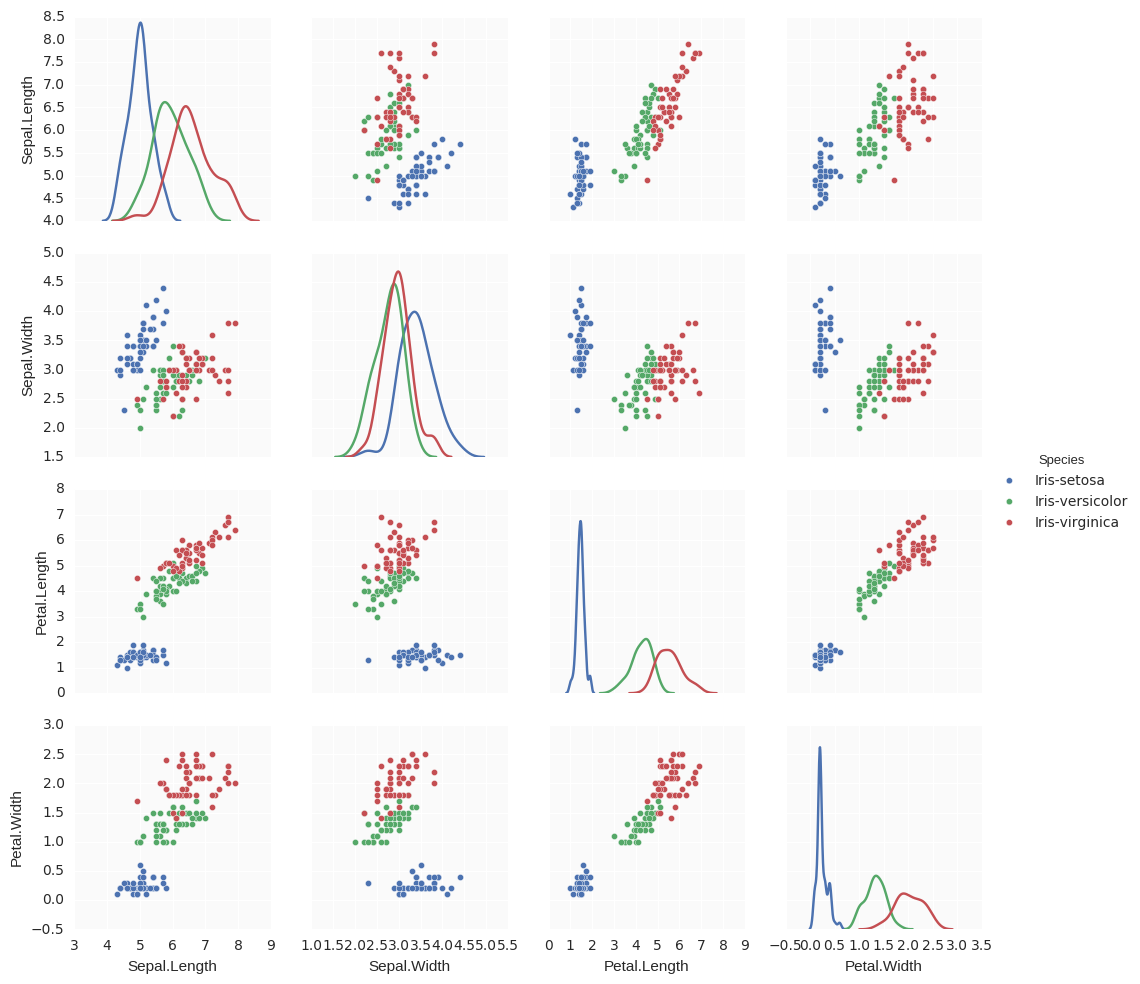

In [49]:
pairsPlot = sns.pairplot(iris, hue = 'Species', diag_kind = 'kde')
pairsPlot.set(axis_bgcolor='#fafafa')

plt.show()

<img src='images/image3.png'>

This plot reduces the dimensions and gives an overarching view of the interactions of the different attributes. This plot will be handy for other classification models like **Linear Discrimant Analysis** which is not in this project but we included more statistical process on Iris in the Github respository.

## 4. Model Estimation
The K-Nearest Neighbor algorithm predicts based on majority votes, measuring a certain number of neighboring observation points (k) and classifies based on attribute prevalence using Euclidean distance. 